# import library yang dibutuhkan

c:\Users\ASUS\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\ASUS\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

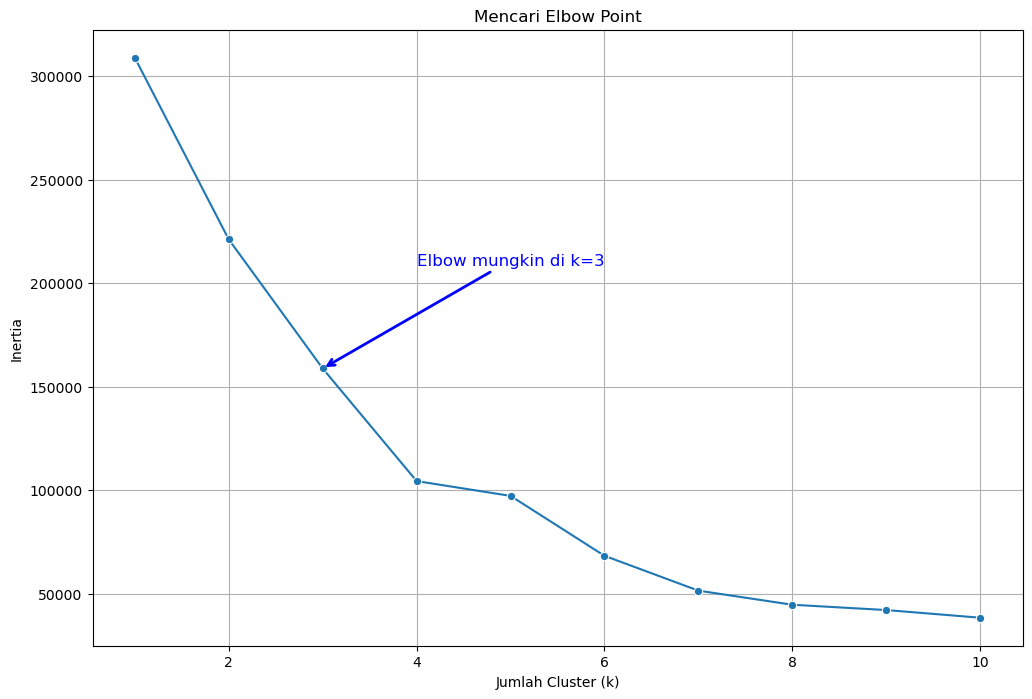

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


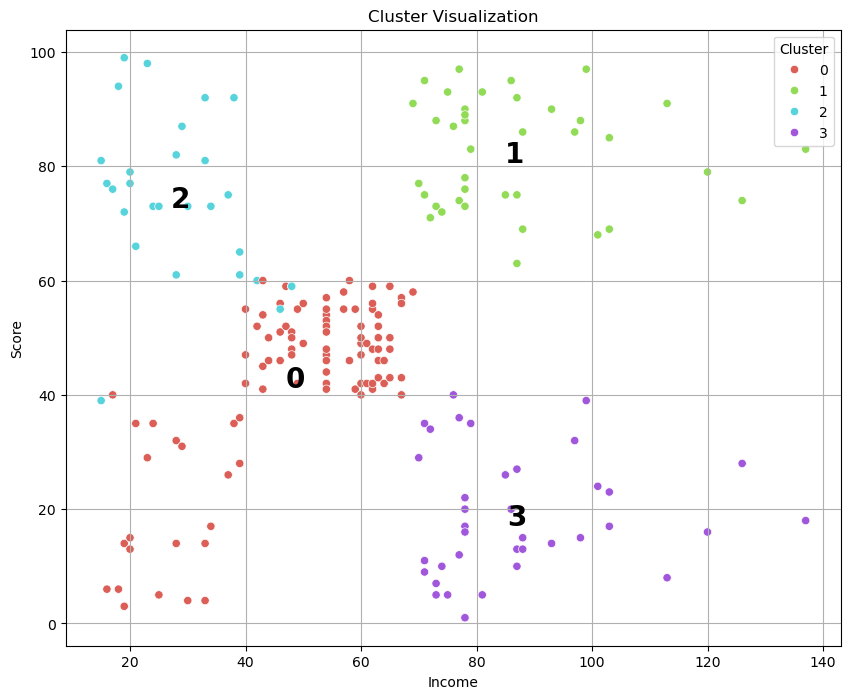

In [1]:
# import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# baca dataset
df = pd.read_csv('Mall_Customers.csv')

# ganti nama kolom supaya lebih mudah
df.rename(columns={'Annual Income (k$)': 'Income',
                   'Spending Score (1-100)': 'Score'},
          inplace=True)

# drop kolom yang tidak dibutuhkan
x = df.drop(['CustomerID', 'Gender'], axis=1)

# tentukan jumlah cluster menggunakan Elbow Method
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(x)
    clusters.append(km.inertia_)

# plot grafik inertia ↔ jumlah cluster
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, marker='o', ax=ax)
ax.set_title('Mencari Elbow Point')
ax.set_xlabel('Jumlah Cluster (k)')
ax.set_ylabel('Inertia')
ax.grid(True)

# contoh anotasi elbow
ax.annotate('Elbow mungkin di k=3',
            xy=(3, clusters[2]), xytext=(4, clusters[2] + 50000),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2),
            fontsize=12, color='blue')
plt.show()

# setelah pilih jumlah cluster, misalnya k = 4
n_clust = 4
kmean = KMeans(n_clusters=n_clust, random_state=42).fit(x)
x['Labels'] = kmean.labels_

# visualisasi scatter plot dengan anotasi centroid
plt.figure(figsize=(10, 8))
sns.scatterplot(data=x, x='Income', y='Score',
                hue='Labels',
                palette=sns.color_palette('hls', n_clust),
                legend='full')

for label in x['Labels'].unique():
    income_mean = x[x['Labels'] == label]['Income'].mean()
    score_mean = x[x['Labels'] == label]['Score'].mean()
    plt.annotate(str(label),
                 xy=(income_mean, score_mean),
                 ha='center', va='center',
                 size=20, weight='bold',
                 color='black')

plt.title('Cluster Visualization')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# simpan hasil ke Excel jika perlu
x.to_excel('output_cluster.xlsx', index=False)
